# Tugas Besar Tahap 2 Classification <br>
# Nama Anggota Kelompok : <br>
 **1. Anang Furkon Rifai - 1301180229** <br>
 **2. Marcello Rasel Hidayatullah - 1301184019**

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Load Dataset

In [ ]:
from google.colab import files
file = files.upload()

Saving salju_test.csv to salju_test.csv
Saving salju_train.csv to salju_train.csv


In [ ]:
# Dataset Test
salju_test = pd.read_csv('salju_test.csv') 

# Mengganti nama kolom "BersaljuBesok" menjadi "Class"
salju_test.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

salju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [ ]:
# Dataset Train
salju_train = pd.read_csv('salju_train.csv')

# Mengganti nama kolom 'BersaljuBesok' menjadi 'Class'
salju_train.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

salju_train.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


# Pre Processing Data

In [ ]:
# Mengecek jumlah data pada kolom 'Class' pada data test
salju_test['Class'].value_counts()

No     13824
Yes     3939
Name: Class, dtype: int64

In [ ]:
# Mengecek jumlah data pada kolom 'Class' pada data train
salju_train['Class'].value_counts()

Tidak    82701
Ya       23963
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


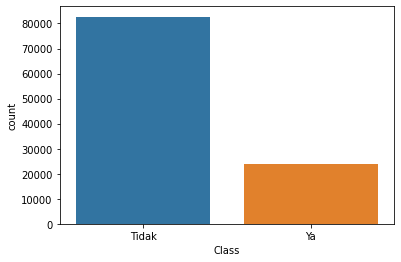

In [ ]:
# Memvisualisasi data pada kolom 'Class' pada data train
train_plot = sns.countplot(salju_train['Class'])
train_plot.set_xticklabels(['Tidak','Ya'])
plt.show()

Preprocessing Data Train

In [ ]:
train_0 = salju_train[salju_train['Class'] == 'Tidak']
train_1 = salju_train[salju_train['Class'] == 'Ya']

print("Class 0 :", train_0.shape)
print("Class 1 :", train_1.shape)

Class 0 : (82701, 24)
Class 1 : (23963, 24)


In [ ]:
# Oversampling Data
train_count_0, train_count_1 = salju_train['Class'].value_counts()
train_1_over = train_1.sample(train_count_0, replace = True)

salju_train_sampling = pd.concat([train_1_over, train_0], axis=0)

print("Total Class 1 and 0 :", salju_train_sampling['Class'].value_counts())

Total Class 1 and 0 : Ya       82701
Tidak    82701
Name: Class, dtype: int64


In [ ]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [ ]:
# Mengatasi Missing Values
salju_train_sampling.fillna(salju_train_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_train_sampling = salju_train_sampling.fillna(salju_train_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [ ]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_train_sampling)

id [ 90747  60556  77247 ... 109093 109094 109095]
Tanggal ['06/07/2011' '09/07/2009' '05/06/2011' ... '27/11/2007' '09/12/2007'
 '29/03/2008']
KodeLokasi ['C40' 'C44' 'C5' 'C20' 'C6' 'C18' 'C13' 'C7' 'C43' 'C17' 'C22' 'C49'
 'C46' 'C28' 'C30' 'C33' 'C9' 'C8' 'C10' 'C38' 'C11' 'C21' 'C15' 'C14'
 'C3' 'C12' 'C45' 'C1' 'C2' 'C34' 'C4' 'C25' 'C47' 'C29' 'C19' 'C32' 'C27'
 'C41' 'C26' 'C16' 'C31' 'C42' 'C48' 'C39' 'C35' 'C23' 'C37' 'C24' 'C36']
SuhuMin [ 7.5 12.3  7.7  3.4 24.6  8.9 10.1 12.1  6.5 10.5 20.5  8.6  5.5 10.9
  7.6  8.2 23.5 10.2  8.7  5.9 13.   7.  11.2 27.  14.2 15.8 25.9 24.3
  6.   6.1 18.  12.9 16.1 17.6 15.1  3.2  9.5  7.3 20.7 12.5 12.2 18.2
  9.2 19.  10.6 14.5 10.   6.8 16.4 22.5  2.1 20.2  3.7 12.  -0.4 11.8
 12.6  7.2  0.9 17.4 11.7 18.9 16.8  9.1 17.2 19.7 20.6  6.3  9.6 23.7
  3.6 17.9  2.7 18.4 15.7 12.8 18.3  7.4 15.4  7.9 17.5  9.4  9.   8.
  6.7 16.7 23.  25.5 13.2 -5.8  5.7 17.1 13.5 14.4 24.8 21.4 16.6 14.7
 -6.2  9.3  8.1 20.9 20.3 16.3 19.6 13.1 10.3  5.8 

In [ ]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
Class                        object
dtype: object
